<a href="https://colab.research.google.com/github/vidhu-psit/MachineLearning/blob/master/Linear_Regression/Class2/Linear_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **Recap**

- Errors & Residuals
- Mathematical equation of line
- optimization
  - MSE
- Gradient descent
- **Code for Univariate LR using Scikit Learn**

- **Scikit-learn implimentation**
    - ASSESSMENT:
        - [Params of model](https://www.scaler.com/hire/test/problem/32440/)


- **Metric: Coefficient of Determination (R2)**
  - SS(sum of squares total)
  - ASSESSMENT:
    - [Infinity and beyond](https://www.scaler.com/hire/test/problem/32430/)
    - [Light Camera R-square](https://www.scaler.com/hire/test/problem/32435/)
    - [R-square equal](https://www.scaler.com/hire/test/problem/32433/)
    - [Size of squares](https://www.scaler.com/hire/test/problem/32438/)
    - [Maxima and Minima of R-squared](https://www.scaler.com/hire/test/problem/24130/)

- **Multivariate Linear Regression**
    - ASSESSMENT:
        - [Life Expectancy](https://www.scaler.com/hire/test/problem/32442/)
        - [Coefficients & Intercept](https://www.scaler.com/hire/test/problem/24118/) coding

####Errors or Residual
<center><img src="https://drive.google.com/uc?id=1dr0jof-XkrDoqCe52q1PmgOZO8isdwuL" width="800" height="650"> </center>

- Error is the difference between the actual value of y and the predicted value of y.
- We could take sum of all the errors.


## Question: But there is a issue while taking sum of errors? Any guess why?

<center><img src="https://drive.google.com/uc?id=1lFNZR4DjMBzL4eRqLO3-jwhtRpSEIjEE" width="800" height="400"> </center>


- But there is an issue with this error. It can be both positive and negative.
- There can be case the error are large value but the sum of error is coming out to be 0.
- Positive and negative values are cancelling out
- Refer to the example in the image above.

<center><img src="https://drive.google.com/uc?id=1t7xkTwjI7PuuJnHyKuImOJBjTiqalr61" width="800" height="400"> </center>

- We don't want our errors to cancel out.
- The solution to this problem is taking the squares of the errors.
- The method where we use **reducing the sum of the squares** is called **Ordinary Least Sqaures**.
- That means linear regression uses **Ordinary Least Sqaures**



> <font color='red'>INSTRUCTOR NOTES - Optional</font>  

**Why squared error?**


<s> https://towardsdatascience.com/https-medium-com-chayankathuria-regression-why-mean-square-error-a8cad2a1c96f </s>

* Absolute Errors: This loss function is not differentiable at 0.

**Why not 3th order function $(y - ŷ)^3$?**
- Output of 3rd order function can be both -ve and +ve.
    - Hence, the issue of error canceling out each other arise again.

**Why not 4th order function? **
- Nothing is stopping us from using 4th order function as loss function.
    - However, the derivative of 2nd order $(y - ŷ)^2$ are easy for computation purposes as compared to derivate of 4th order function.



#### Code implementation for Geometric intuition
- Here to show code implementaion of geometric intuition we will using same dataset but without clean part,so that we develop better understanding.
- We will predicting price of a car using Max_power      

In [ ]:
!gdown 1RRbLfbAPiihXP50KDQQc6Cr52-r0fsoF

Downloading...
From: https://drive.google.com/uc?id=1RRbLfbAPiihXP50KDQQc6Cr52-r0fsoF
To: /content/train-cars24-car-price.csv
100% 1.25M/1.25M [00:00<00:00, 26.9MB/s]


In [ ]:
# Displaying our data
import pandas as pd
import numpy as np
data = pd.read_csv('/content/train-cars24-car-price.csv')
data.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0


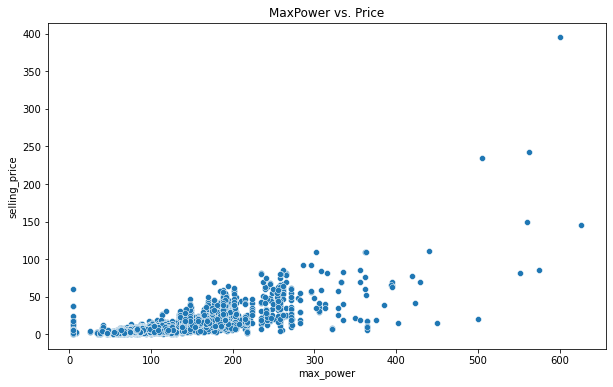

In [ ]:
# using single feature to predict selling price of a car
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('MaxPower vs. Price')
sns.scatterplot(data=data, x='max_power', y='selling_price');

### What can be the mathematical equation for the line ?

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict price for a given max power. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept").

### Model

In the above case, the x axis shows "max_power" and the y axis shows "selling price of a car". Thus, we're assume the following relationship between the two:

$price = w \times maxpower + b$

We'll try determine $w$ and $b$ for the line that best fits the data.

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "max_power" and "price" as a straight line.

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "max_power" column of the dataset are called the _inputs_ to the model and the values in the "selling_price" column are called "targets".

Let define a helper function `estimate_charges`, to compute $price$, given $maxpower$, $w$ and $b$.

In [ ]:
def estimate_charges(maxpower, w, b):
    return w * maxpower + b

The `estimate_charges` function is our very first _model_.

Let's _guess_ the values for $w$ and $b$ and use them to estimate the value for price.

In [ ]:
w = 50
b = 100

In [ ]:
maxpower = data.max_power
estimated_charges = estimate_charges(maxpower, w, b)

We can plot the estimated charges using a line graph.

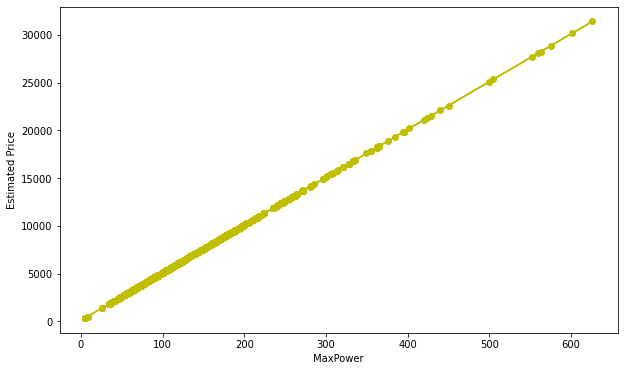

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(maxpower, estimated_charges, 'y-o');
plt.xlabel('MaxPower');
plt.ylabel('Estimated Price');

As expected, the points lie on a straight line.

We can overlay this line on the actual data, so see how well our _model_ fits the _data_.

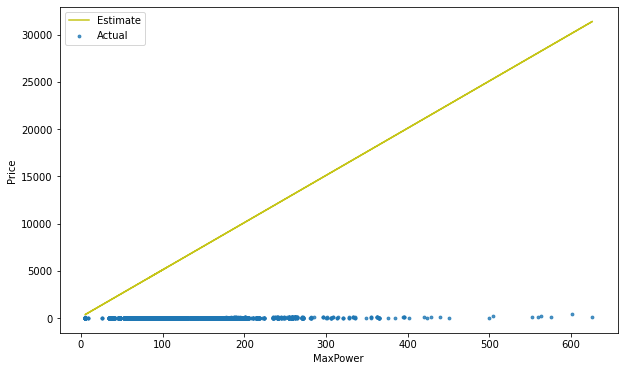

In [ ]:
target = data.selling_price
plt.figure(figsize=(10,6))
plt.plot(maxpower, estimated_charges, 'y', alpha=0.9);
plt.scatter(maxpower, target, s=8,alpha=0.8);
plt.xlabel('MaxPower');
plt.ylabel('Price')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [ ]:
def try_parameters(w, b):
    maxpower = data.max_power
    target = data.selling_price

    estimated_charges = estimate_charges(maxpower, w, b)
    plt.figure(figsize=(10,6))
    plt.plot(maxpower, estimated_charges, 'r', alpha=0.9);
    plt.scatter(maxpower, target, s=8,alpha=0.8);
    plt.xlabel('MaxPower');
    plt.ylabel('Price')
    plt.legend(['Estimate', 'Actual']);

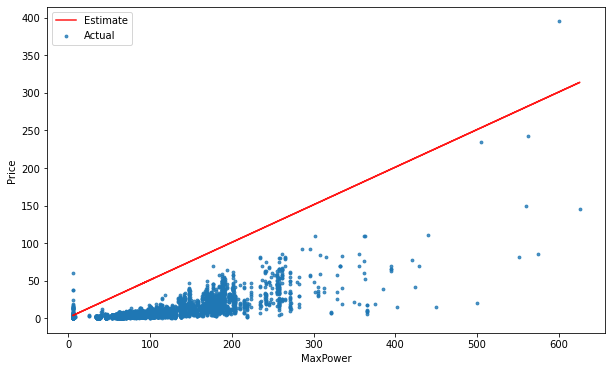

In [ ]:
try_parameters(0.5, 1)

**Observation:**
- By trying different parameters we see line here is moving towards our points.

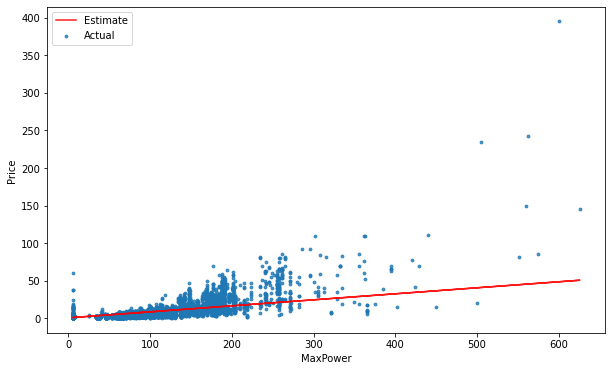

In [ ]:
try_parameters(0.08, 0.5)

**Observation:**

As we change the values, of $w$ and $b$ manually, trying to move the line visually closer to the points, we are _learning_ the approximate relationship between "max_power" and "price".

Wouldn't it be nice if a computer could try several different values of `w` and `b` and _learn_ the relationship between "max_power" and "price"? To do this, we need to solve a couple of problems:

1. We need a way to measure numerically how well the line fits the points.

2. Once the "measure of fit" has been computed, we need a way to modify `w` and `b` to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine `w` and `b` for the best fit line, starting from a random guess.

####Interactive Visualisation of w and b

- Each time we are changing these parameters and line is adjusting itself.

<center><img src="https://drive.google.com/uc?id=1om0cIV3EJRjPJNEb6WFhj8Ym_PAOIklg" width="800" height="450"> </center>



- Click on the link to try yourself: https://phet.colorado.edu/sims/html/least-squares-regression/latest/least-squares-regression_en.html



## Optimization
- It is a method to find optimal values of w and b.
- Its uses Gradient descent on top of your cost function to do so.
- Let's see step by step how it works.

#### Cost Function

- It is a function that measures the performance of a Machine Learning model for given data.
- Cost Function quantifies the error between predicted values and expected values and presents it in the form of a single real number.
- We use MSE as our Cost function in linear regression

#### Mean Squared Error

<center><img src="https://drive.google.com/uc?id=1gVLLUfjr4qf1JX3UQu2dISsItQ9PfMaP" width="800" height="400"> </center>

- Here, the error equation is also referred to as loss function/cost function.
- We are trying to minimize our cost function i.e our mean sum of squared error.

#Gradient Descent
- We minimized the error by trial and error above — just trying lots of values and visually inspecting the resulting graph.
- There must be a better way? Queue gradient descent.
- Let's take this eqn $y= x^2$

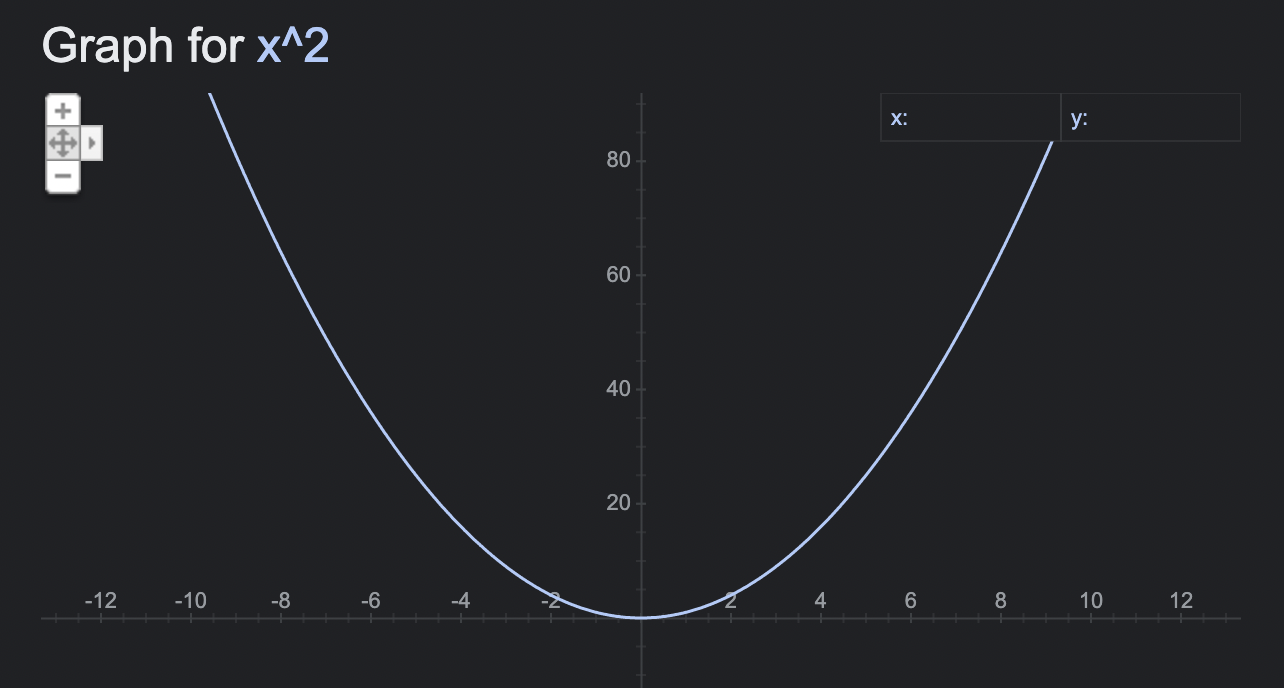




- Gradient Descent is a general function for minimizing a function, in this case the Mean Squared Error cost function.

- **Gradient Descent** basically just does what we were doing by hand — change the parameters, bit by bit, until we hopefully arrived a minimum.


####Interactive visualisation Gradient descent
- It will show how in steps Gradient descent happens
  - Select a random starting point
  - Set your step size/learning rate
  - Click on next interation to see the magic!

<center><img src="https://drive.google.com/uc?id=1CrLy9R-aHKmP4FWkYeHsjZPEfopZZWP_" width="800" height="450"> </center>

- Click on the link to try it yourself:https://uclaacm.github.io/gradient-descent-visualiser/#playground

- Any Learner who wants to deep dive in maths for Gradient Descent can go through PostRead.

## What did we learn in last lecture?


$ $

- We started off with supervised learning. We learnt that
    - for supervised learning, we need a label

- We talked about Cars24 dataset.
    - its various features
    - and our target variable ($y$) i.e. Price



<center><img src="https://drive.google.com/uc?id=1xkg43ioU7ckJQRKXONw2NKUnmp4VNp1r" width="600" > </center>






- We understood what a model is
    - Model is nothing but understanding a pattern from given data

For example: For the following pattern:

<center><img src="https://drive.google.com/uc?id=1As_e5OPnRX4SVf3A1B6ggv9LT5EhYUPI" width="600" > </center>


Using the pattern, we were able to come up with the equation.
- This equation is nothing but our ML model.





Following this, we took a slightly complex example

-  with 2 columns as independent column
- and one target variable (dependent variable)

<center><img src="https://drive.google.com/uc?id=1awg44eMKOXozREqHjbjCqcD-PoSIrgM4" width="600" > </center>

Looking at the data,
- we were able to identify the pattern and came up with equation

**Equation: $y = 2x_1 + x_2$** (ML model)

We then understood the importance on unseen data.

- Once we have our model built up, we pass this unseen data to the model to get the predictions

We learnt about the significance of train and test data.
- and why we use all the data for training the model
- because we need to validate our model.


<center><img src="https://drive.google.com/uc?id=1vapp5dejqKXeLScmBEK6pakhppZqacsH" width="600" > </center>


Next, we look at the whole process of model training and validating

<center><img src="https://drive.google.com/uc?id=1u3uZn0p62Mp0TR6HK34x23VLCeBaeK7U" width="600" > </center>



We understood
- equation of a line
- slope of a line and how to calculate it
- and lastly, line of best fit.

<center><img src="https://drive.google.com/uc?id=1cEBE8T73GfDHOiPSaTkuaSOL71AQkYVP" width="600" > </center>



We also learnt the concept of errors
- and why we take square of errors



<center><img src="https://drive.google.com/uc?id=1d8njBOF09tAOtcqMHYZ_Pkj2BgqadCR7" width="600" > </center>


Once we got this
- we understood that we want to minimize these error
- and we understood how Gradient descent works intuitively.


<center><img src="https://drive.google.com/uc?id=1FwtiH7PAS-7trod9T7hCPzGcWC1ek9js" width="400" > </center>




## Code for Univariate LR using Scikit Learn




Recall that we had various columns in our Cars24 dataset.

We had
- selling price
- make
- year
... etc etc



<center><img src="https://drive.google.com/uc?id=1FTpRb1StCKvIfEB1fWcFAzOZ8_eVgHxw" width="600" > </center>


#### Question: Which columns will be independent variables?



Ans: Everything except selling price.

Here we have many columns, but there are independent and dependent columns
- The independent columns are features or values which are not dependent on ay other value
- The dependent columns are the column which depends on other columns

For example, in the above data set **selling price** of the car is effected by other factors so , it is considered as the **dependent column**



<center><img src="https://drive.google.com/uc?id=1J2gPRn6iwMjkEwYLpnctZoojn1Q-SItX" width="900" height="600"> </center>

Hence here our first step would be to seperate these independent and dependent columns

Let's do the same

- In this case, the x axis shows "model" and the y axis shows "selling price of a car". Thus, we're assume the following relationship between the two:

$price = w \times maxpower + c$

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 35.0MB/s]


### Loading data

the data that we load here is the preprocessed data

In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


**What is our objective?** To create the model

If you look at the data, there are lots of columns

Now, we have 2 options:
- **Option 1**: Take all the columns for model building

OR

For simplicity, let's only consider 1 column (as $x$) for model building.

**We'll use model columns to predict the selling price**


### Define X and y


In [ ]:
# define X and y
X = df["model"].values
Y = df["selling_price"].values

### Scikit-learn


Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.

- We have a library which does it for us and provides key insights such as weights of the model, performance of the model.


- Link For linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Lets import the required functions  from the existing libraries like Scikitlearn.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

- Notice how ```model``` is just an object of Linear Regression Class




####**How to train the model using LinearRegression class?**
- Scikit-learn provides an inbulit [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method to train the model



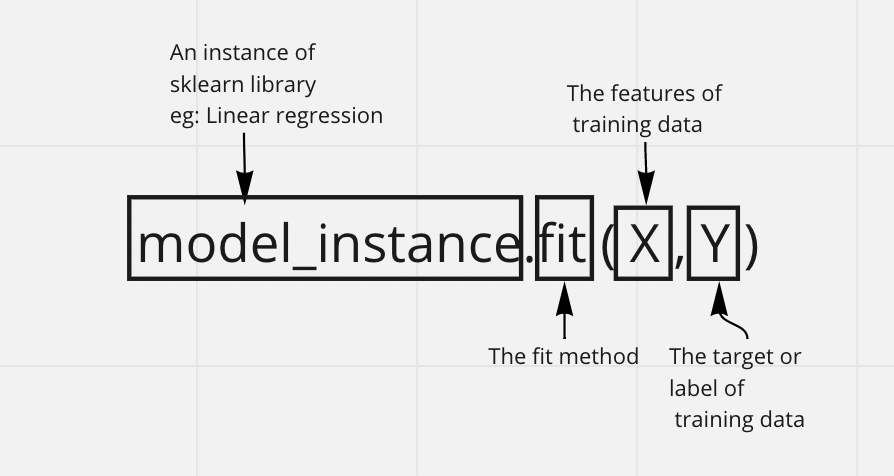

- The 'fit' method trains the algorithm on the training data, after the model is initialized. That's really all it does.
- So the sklearn fit method uses the training data as an input to train the machine learning model.

In [ ]:
model.fit(X,Y)

ValueError: ignored

- But when we used fit method on our X and Y, it gave a shape error

#### **Why was there shape error when using fit method?**
- the documentation for fit method says:
  - X (array-like, sparse matrix) of shape (n_samples,n_features)
  - Y (array-like, sparse matrix) of shape (n_samples,) or (n_samples, n_features)

Lets check our X and Y:

In [ ]:
print(X.shape,Y.shape)

(19820,) (19820,)


- Notice how X and Y shapes are incompatible with the Scikit learn fit method




reshaping X, Y to the required shape

In [ ]:

X = X.reshape(X.size, 1)
Y = Y.reshape(Y.size, 1)

print(X.shape,Y.shape)

(19820, 1) (19820, 1)


Since now our Data is in required shape

- Now lets fit the model

In [ ]:
model.fit(X,Y)

LinearRegression()

Now that our model is trained,

#### How do we see the predictions of the trained **model** object?

model.predict() : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label for each object in the array

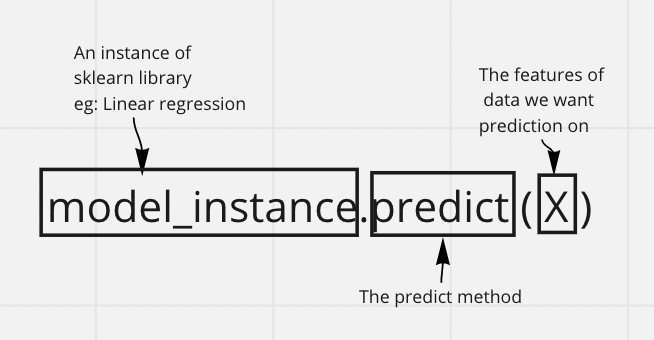

In [ ]:
y_hat = model.predict(X)

print('Predicted')
print(y_hat[:3])
print('Actual')
print(Y[:3])

Predicted
[[-1.08634131]
 [-0.32158118]
 [-0.76220457]]
Actual
[[-1.11104589]
 [-0.22394353]
 [-0.91505816]]


Note:
- For now, we are passing whole X
- Later on, we'll split our data into train and test.

#### What are the learnt parameters?

In [ ]:
c = model.intercept_
m = model.coef_
print(c, m)

[-1.18731936e-16] [[0.96505112]]


- Notice how scikit-learn did all the implementation much quickly and with less code.

- This is our final eqn that our LR model has learnt from training the data.

  $sellingprice = m \times model + c$

where, $m$ =0.965 and $c$ = -1.18

- m is your coefficient of variable "model" and c is the intercept.

the final equation will be then $selling price=0.965 model -1.18$

Lets see how our LR model performed

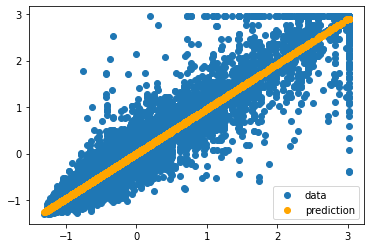

In [ ]:
fig = plt.figure()
plt.scatter(X,Y,label='data')
plt.scatter(X,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

###Error

When we were previously calculating the error term we used the following formula
$error =\sum(y_i-ŷ_i)^2$





<center><img src="https://drive.google.com/uc?id=1r6LkxMPl1Z6AYGtmj7rwb0nx6q830rc0" width="900" height="600"> </center>


But what is the problem with using this as error term
- When we have different scales in the data the comaprison of models won't be accurate because the models with greater scale will have greater term


Let's see an example to understand the same

<center><img src="https://drive.google.com/uc?id=1877vQaRXJdWDkKut7aKLmXKhwYMZ6lfo" width="900" height="600"> </center>



- In the above example you can see that error of Model 2 is much greater than the Model 1, even if there's no much difference between both the models.

So, What is the reliable model?


##Metric: Coefficient of Determination  (R<sup>2</sup>)


let's say we have the data distributed as shown in the following

#### Question: What will be worst model that we can built

Ans: Mean model

- Mean model returns mean of yi's as predicted value everytime.

<center><img src="https://drive.google.com/uc?id=1IjquG3XtS1JJsOk2kvgJuBLaFjfjmU5K" width="900" height="600"> </center>




Here,

- <font color ='pink'> Pink line</font> represents the model that we built

- Black line represent the model that we built

Now,

- SS_residual = sum of squared errors for the model that we built
- SS_total = sum of squared errors if the model was mean model.



By using these values we find the ratio of these values to see the similarity between the two models
- So we want the $\frac{SS_{res}}{SS_{total}}$ to be as less as possible i.e  close to 0

Let's see anopther example where this ratio may be high


<center><img src="https://drive.google.com/uc?id=1yZtg_LpSYgLhTwB_rBvtbIFeWgwDduna" width="900" height="600"> </center>



Here we can see that the value of ratio is almost close to 1



Now, Lets see how the $R^2$ Metric is calculated


<center><img src="https://drive.google.com/uc?id=1LV1ZTguygYf3iOi82VrZ1IpPSqpN7DMq" width="900" height="600"> </center>


- Intuitively, R-square tells us that how much our model is performing better as compared to mean model.
- **Intuition behind considering mean model as baseline model?** Simplest model that you can build to predict a value is just take mean of all value and return it.

Another definition is “(total variance explained by model) / total variance.”

Score : R2 (R-Squared) or Coefficient of Determination

* R2 score = 1; means perfect model
* R2 score = 0; dumb model, just taking an average of training data.
* R2 score = -1; even worse than dumb model? But is that possible? Theoritically yes.

<center><img src="https://drive.google.com/uc?id=1mGhIkXbNIb7LPelO168LsJeBj4FnY2yn" width="700" height="400"> </center>

#### Question: What do think is best value of R-square?
**Ans: 1**

#### Question: Now, what do you think is minimum value of R-square ?
**Ans: -inf**.

When our model is far worse than mean model i.e. value of SS_residual >> SS_total, the value of R-square will tend to -inf.

- Best value of R-square is 1. When SS residual = 0, R-square = 1
- R-square will be 0 when SS residual = SS total i.e. our model is mean model
- Minimum value of R-square will be -inf. When our model is far worse than mean model, R-square will tend to -inf. (SS residual >> SS total)
- Example when R-square will be large -ve value
  - Imagine you have all horizontal points and you predict the line of best fit as vertical.


#### How do we get the performance metric for our model using sklearn?


```score``` Returns the coefficient of determination of the prediction ($R^2$)

In [ ]:
model.score(X,Y)

0.9313236629576508

#### Does $R^2$ = 0.93, suggests our model good?
Ans: Yes, it means that our Univariate LR model performed much better than a mean model

####But can we be sure by just One Feature, we can estimate the selling price of a Car?####
- No, hence we will now look into more features, and how to perform Linear Regression on them


### Machine Learning

Congratulations, you've just trained your first Linear Regression model! Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets.

Every machine learning problem has three components:

1. **Model**

2. **Error/Cost Function**

3. **Optimizer**

Here's how the relationship between these three components can be visualized:


<center><img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480"></center>

- Your training data with it's y labels is given to model, so that model understands patterns.
- It compares the errors between actual y and predicted y using loss function.
- Then it minimizes the our error using optimization method(GD)


###How would  MSE look in 3D

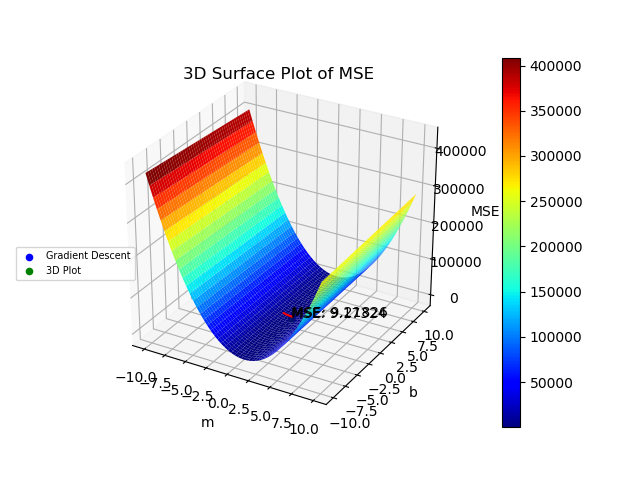

####Fitting of a line and Gradient descent together with 3D.
<center><img src="https://drive.google.com/uc?id=1xBEVsBhLqPbZKetapxFdBybWmMycsJpT" width="700" height="450"> </center>

- We start off with random value of w and b.

- We observe our w and b changes how our cost fucntion is reducing.

- We can observe the how line comes to the best fit, when GD finds minimum value of cost function.



## Multivariate Linear Regression



### Code for Multivariate LR using sklearn


Lets consider all of the features of Cars24 data to predict the selling price

In [ ]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


**Getting X and Y**
- Removing the selling price and taking rest of the features in X

In [ ]:
X = df[df.columns.drop('selling_price')]
Y = df["selling_price"]

Convert X and Y from dataframes to numpy array but Why numpy array?
-  Since Y is of series datatype before reshaping it to 2d format we convert to numpy array because rehaping is not possible in series type.

In [ ]:
X = X.to_numpy()
Y = Y.to_numpy()

In [ ]:
print(X.shape, Y.shape)

(19820, 17) (19820,)


In [ ]:
Y = Y.reshape(Y.size, 1)

print(X.shape,Y.shape)

(19820, 17) (19820, 1)


In [ ]:
model.fit(X,Y)

LinearRegression()

In [ ]:
y_hat = model.predict(X)

print('Predicted')
print(y_hat[:3])
print('Actual')
print(Y[:3])

Predicted
[[-1.18307059]
 [-0.29426139]
 [-0.89454215]]
Actual
[[-1.11104589]
 [-0.22394353]
 [-0.91505816]]


In [ ]:
model.score(X,Y)

0.942188902908119

In [ ]:
print(model.coef_)
print(model.intercept_)

[[-4.96486379e+10 -1.82418823e-02 -4.86815023e-02  3.13906593e-02
   2.73634634e-02 -4.96486379e+10  6.07857256e-02  7.94156945e-01
  -1.69523399e-02 -3.47465435e-03  1.40831991e-02  1.27530752e-02
   2.82949517e-03 -2.25842030e-02 -1.29368142e-02 -2.46388004e-02
  -3.26559557e-02]]
[-3.59538383e-06]
